In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('gld_price_data.csv')

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
df.shape

(2290, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
df["Date"] = pd.to_datetime(df["Date"])

In [10]:
correlation = df.corr()


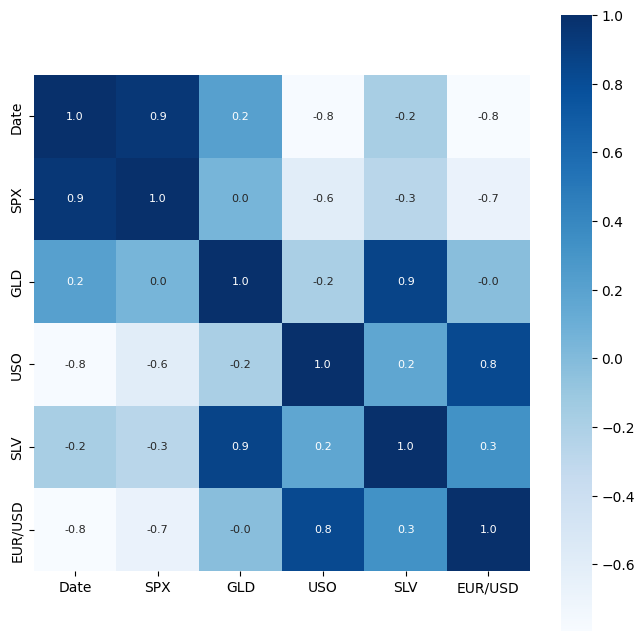

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation 
            ,cbar=True
            ,square=True
            ,fmt='.1f'
            ,annot=True
            ,annot_kws={'size':8}
            ,cmap='Blues')
plt.show()

In [13]:
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


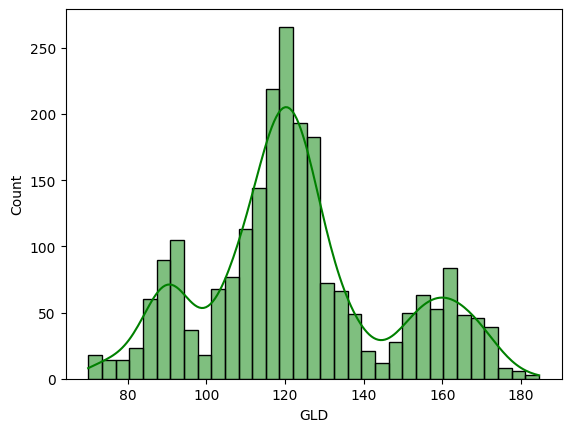

In [15]:
sns.histplot(df['GLD'] , color='green' , kde=True)
plt.show()

In [16]:
X = df.drop(['Date' , 'GLD'] ,axis=1)
Y = df['GLD']

In [18]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [19]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [20]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X ,Y , test_size=0.2 , random_state=2)

In [21]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100)

In [22]:
regressor.fit(X_train , Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
test_pred = regressor.predict(X_test)
print(test_pred)

[168.61389956  82.36299965 116.14050026 127.64470093 120.69130162
 154.75189755 150.23269894 126.13980091 117.49659894 125.91470091
 116.81560156 171.81250073 141.39149844 168.03989851 115.30410007
 117.57730038 138.39750305 170.05370108 160.23540318 157.18669914
 155.22880047 125.24370017 176.1478996  157.15810319 125.25030028
  93.88329963  77.15289994 120.56920009 119.14389959 167.47289972
  88.0666001  125.3648004   91.38600119 117.71510001 121.22899903
 136.46660099 115.33220109 115.42700091 148.11059999 107.16460059
 103.93760231  87.06299776 126.49340066 118.12430015 153.48669906
 119.61140001 108.27430013 108.3144983   93.24720055 127.03659808
  75.29410035 113.67969912 121.48060019 111.35439911 118.74449896
 120.79279919 157.41400077 167.82620116 147.01779707  85.79179865
  94.1776002   86.8010984   90.45490026 118.96700087 126.48610085
 127.47090001 169.4952998  122.18239952 117.59889871  98.72230025
 168.7186011  143.40559818 131.94930258 121.19440224 120.92189898
 119.87850

In [25]:
from sklearn import metrics
error_score = metrics.r2_score(Y_test , test_pred)
print('R squared error :' , error_score)

R squared error : 0.9890103417366313


In [26]:
Y_test = list(Y_test)

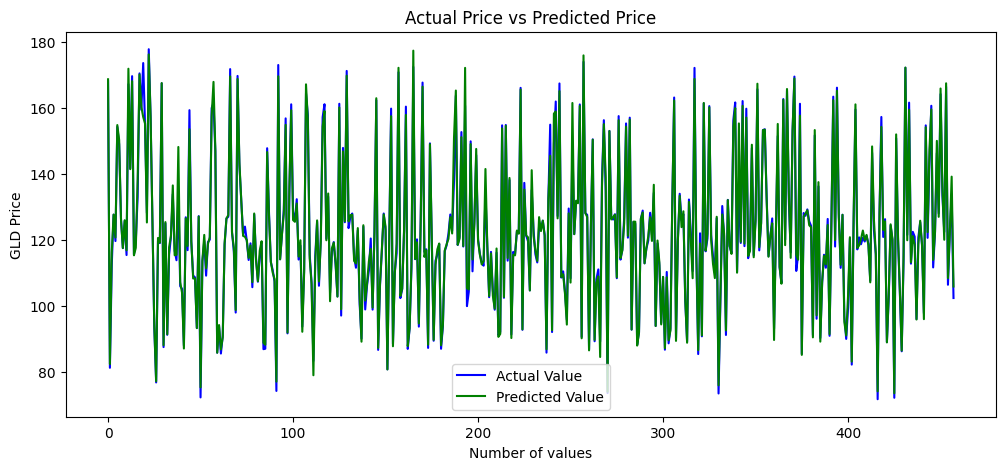

In [36]:
plt.figure(figsize=(12,5))
plt.plot(Y_test , color = 'blue' , label = 'Actual Value')
plt.plot(test_pred , color = 'green' , label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()
